In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


In [3]:
stolen_base=pd.read_csv("stolen_base_features.csv")

In [4]:
stolen_base.drop(columns=stolen_base.columns[0]).head()

,game_pk,at_bat_number,runner_id,pitcher_id,catcher_id,successful_sb,runner_sprint_speed,pitch_tempo,sb_att_rate,lead_dist_gained_opp,lead_dist_gained_att,pop_time,exchange_time,arm_strength,cs_aa_per_throw
0,717800,20,655316,676664,542208,1,28.0,17.433,0.023847,1.847397,9.773667,1.988417,0.644583,78.32061,0.175065
1,717660,30,608070,676664,542208,0,27.8,17.433,0.023847,1.847397,9.773667,1.988417,0.644583,78.32061,0.175065
2,717660,38,665926,676664,542208,1,29.2,17.433,0.023847,1.847397,9.773667,1.988417,0.644583,78.32061,0.175065
3,718200,22,669352,686610,542208,1,30.4,15.792,0.014737,1.715638,14.375143,1.988417,0.644583,78.32061,0.175065
4,718565,43,516782,660261,542208,1,27.1,17.923,0.012097,3.617790,8.765000,1.988417,0.644583,78.32061,0.175065


In [5]:
stolen_base.columns[1]

'game_pk'

In [6]:

successfull_sb=stolen_base[stolen_base["successful_sb"]==1]
unsuccessfull_sb=stolen_base[stolen_base["successful_sb"]==0]

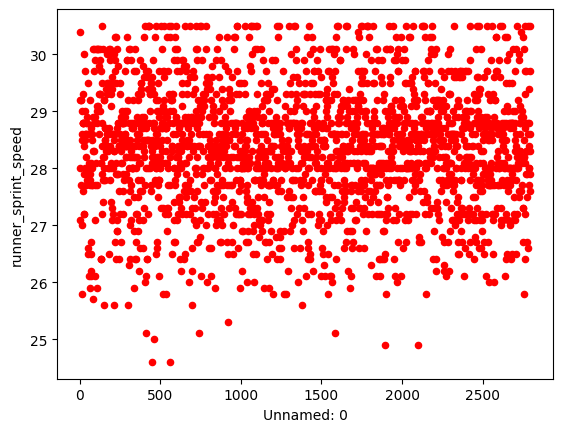

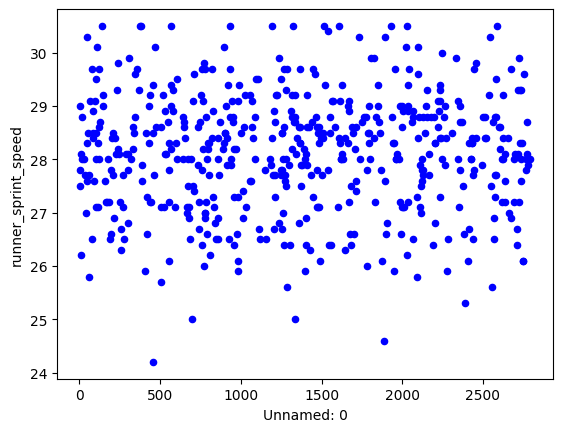

In [7]:

successfull_sb.plot.scatter(y="runner_sprint_speed", x="Unnamed: 0", color="red")
unsuccessfull_sb.plot.scatter(y="runner_sprint_speed", x="Unnamed: 0", color="blue")

plt.show()

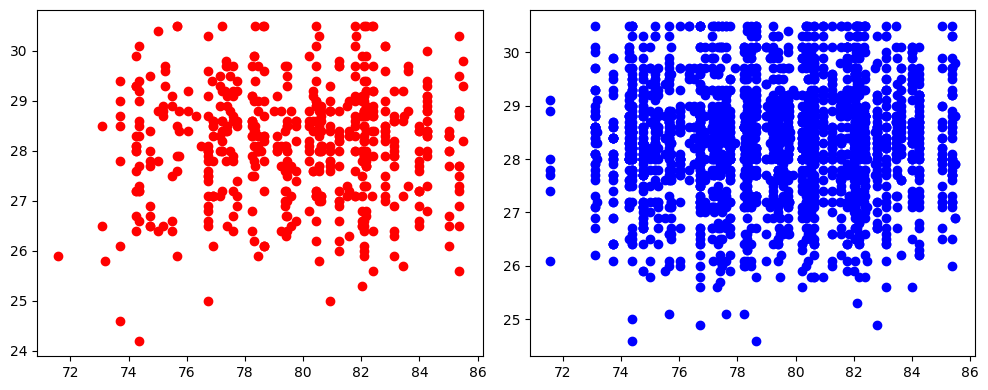

In [8]:
fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1[0].scatter(unsuccessfull_sb["arm_strength"], unsuccessfull_sb["runner_sprint_speed"], color="red")
ax1[1].scatter(successfull_sb["arm_strength"], successfull_sb["runner_sprint_speed"], color="blue")
fig.tight_layout()


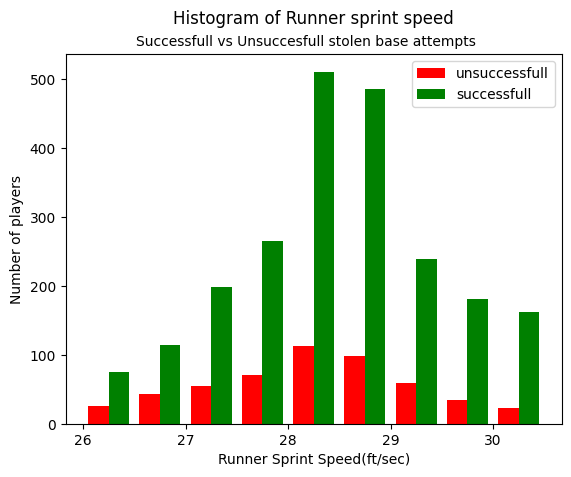

In [9]:
bin_range = np.arange(26, 31, .5)
plt.hist([unsuccessfull_sb["runner_sprint_speed"], successfull_sb["runner_sprint_speed"]], color=["red", "green"], bins=bin_range)
plt.xlabel("Runner Sprint Speed(ft/sec)")
plt.ylabel("Number of players")
plt.title("Histogram of Runner sprint speed", y=1.06)
plt.suptitle("Successfull vs Unsuccesfull stolen base attempts", fontsize=10, y=.92)
plt.legend(["unsuccessfull", "successfull"])
plt.show()

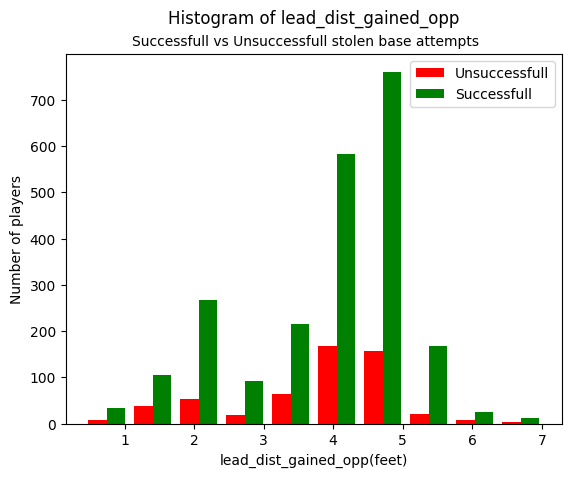

In [10]:
plt.hist([unsuccessfull_sb["lead_dist_gained_opp"], successfull_sb["lead_dist_gained_opp"]], color=["red", "green"])
plt.xlabel("lead_dist_gained_opp(feet)")
plt.ylabel("Number of players")
plt.title("Histogram of lead_dist_gained_opp", y=1.06)
plt.suptitle("Successfull vs Unsuccessfull stolen base attempts", fontsize=10, y=.92)
plt.legend(["Unsuccessfull", "Successfull"])
plt.show()

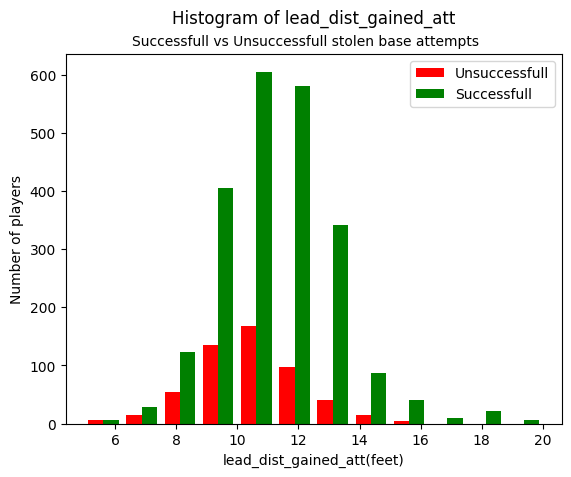

In [11]:
bin_range = np.arange(5, 21, 1.25)
plt.hist([unsuccessfull_sb["lead_dist_gained_att"], successfull_sb["lead_dist_gained_att"]], color=["red", "green"], bins=bin_range)
plt.xlabel("lead_dist_gained_att(feet)")
plt.ylabel("Number of players")
plt.title("Histogram of lead_dist_gained_att", y=1.06)
plt.suptitle("Successfull vs Unsuccessfull stolen base attempts", fontsize=10, y=.92)
plt.legend(["Unsuccessfull", "Successfull"])
plt.show()

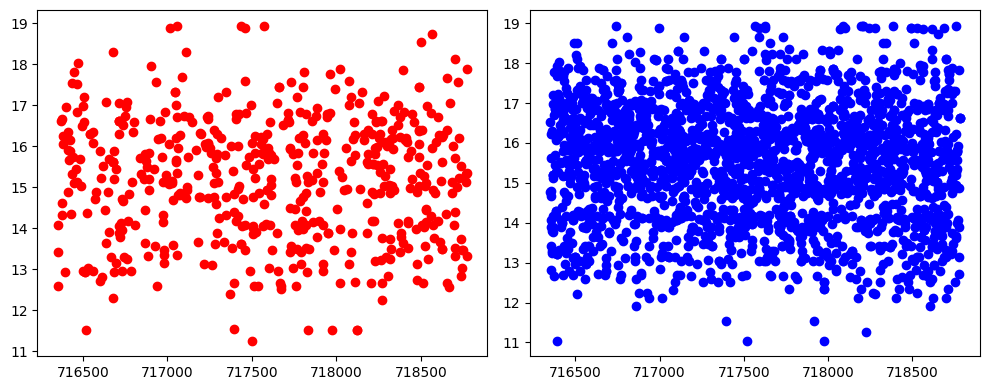

In [12]:
fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1[0].scatter(unsuccessfull_sb["game_pk"], unsuccessfull_sb["pitch_tempo"], color="red")
ax1[1].scatter(successfull_sb["game_pk"], successfull_sb["pitch_tempo"], color="blue")
fig.tight_layout()


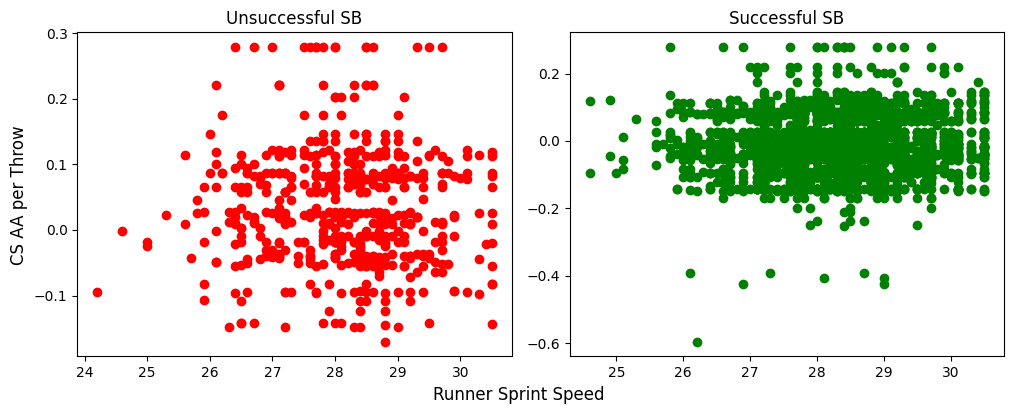

In [13]:
fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1[0].scatter(unsuccessfull_sb["runner_sprint_speed"], unsuccessfull_sb["cs_aa_per_throw"], color="red")
ax1[1].scatter(successfull_sb["runner_sprint_speed"], successfull_sb["cs_aa_per_throw"], color="green")
fig.text(0.5, 0, "Runner Sprint Speed", ha="center", va="center", fontsize=12)
fig.text(0, 0.5, "CS AA per Throw", ha="center", va="center", rotation="vertical", fontsize=12)
ax1[1].set_title("Successful SB")
ax1[0].set_title("Unsuccessful SB")
fig.tight_layout()

In [14]:
X = stolen_base[['runner_sprint_speed', 'lead_dist_gained_opp', 'lead_dist_gained_att', 'cs_aa_per_throw']]
y = stolen_base['successful_sb']

rs = RandomOverSampler()
X_resampled, y_resampled = rs.fit_resample(X, y)
print(f'Oversampling: X_resampled={X_resampled},\ny_resampled={y_resampled}')

Oversampling: X_resampled=      runner_sprint_speed  lead_dist_gained_opp  lead_dist_gained_att  \
0                    28.0              1.847397              9.773667   
1                    27.8              1.847397              9.773667   
2                    29.2              1.847397              9.773667   
3                    30.4              1.715638             14.375143   
4                    27.1              3.617790              8.765000   
...                   ...                   ...                   ...   
4517                 26.7              2.253747             10.258500   
4518                 28.2              3.903537             11.303000   
4519                 29.9              4.721408             10.434500   
4520                 26.1              4.585104              9.726500   
4521                 28.3              3.518475              8.784167   

      cs_aa_per_throw  
0            0.175065  
1            0.175065  
2            0.175065  
3

In [15]:
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['successfull_sb'] = y_resampled

len(resampled_data==0)

4522

In [16]:
re_suc=resampled_data[resampled_data["successfull_sb"]==1]
re_unsuc=resampled_data[resampled_data["successfull_sb"]==0]

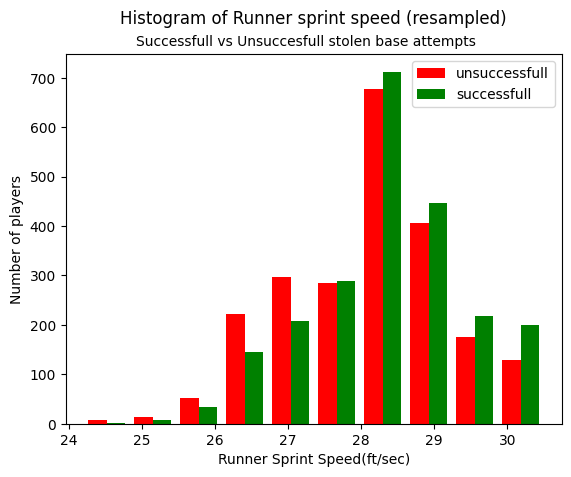

In [17]:
plt.hist([re_unsuc["runner_sprint_speed"], re_suc["runner_sprint_speed"]], color=["red", "green"])
plt.xlabel("Runner Sprint Speed(ft/sec)")
plt.ylabel("Number of players")
plt.title("Histogram of Runner sprint speed (resampled)", y=1.06)
plt.suptitle("Successfull vs Unsuccesfull stolen base attempts", fontsize=10, y=.92)
plt.legend(["unsuccessfull", "successfull"])
plt.show()

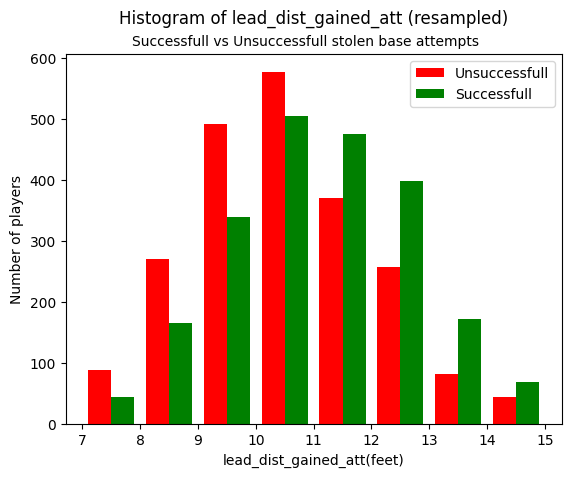

In [18]:
bin_range = np.arange(7, 16, 1)

plt.hist([re_unsuc["lead_dist_gained_att"], re_suc["lead_dist_gained_att"]], color=["red", "green"],bins=bin_range)
plt.xlabel("lead_dist_gained_att(feet)")
plt.ylabel("Number of players")
plt.title("Histogram of lead_dist_gained_att (resampled)", y=1.06)
plt.suptitle("Successfull vs Unsuccessfull stolen base attempts", fontsize=10, y=.92)
plt.legend(["Unsuccessfull", "Successfull"])
plt.show()

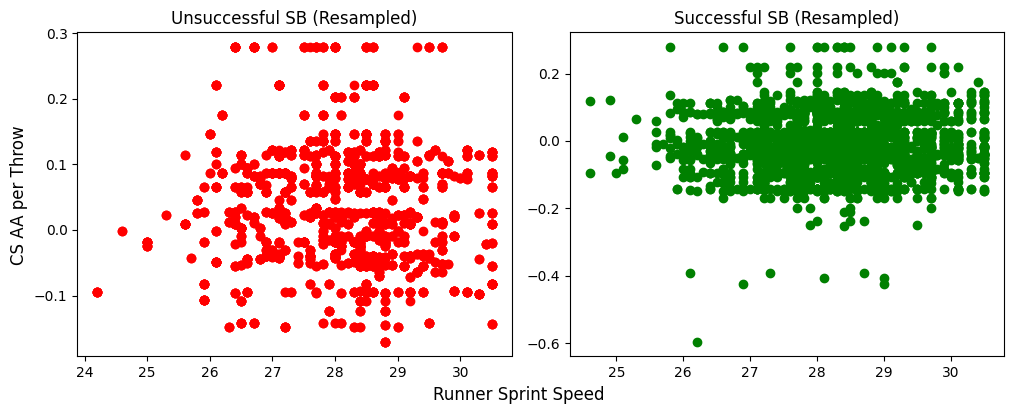

In [19]:
fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1[0].scatter(re_unsuc["runner_sprint_speed"], re_unsuc["cs_aa_per_throw"], color="red")
ax1[1].scatter(re_suc["runner_sprint_speed"], re_suc["cs_aa_per_throw"], color="green")
fig.text(0.5, 0, "Runner Sprint Speed", ha="center", va="center", fontsize=12)
fig.text(0, 0.5, "CS AA per Throw", ha="center", va="center", rotation="vertical", fontsize=12)
ax1[1].set_title("Successful SB (Resampled)")
ax1[0].set_title("Unsuccessful SB (Resampled)")
fig.tight_layout()